In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
RS = 7092022

In [31]:
df = pd.read_csv('fish_final.csv')
df.head(3)

,Species,Weight,Length,Height,Width,Days,Gender
0,Bream,242.0,30.0,11.5200,2.140856,44.950718,0
1,Bream,290.0,31.2,12.4800,3.360002,54.654179,0
2,Bream,340.0,31.1,12.3778,4.201341,25.640887,0


In [32]:
df.dtypes

Species     object
Weight     float64
Length     float64
Height     float64
Width      float64
Days       float64
Gender       int64
dtype: object

In [33]:
df = df.drop(columns=['Species'], axis=1)
df = df.drop(columns=['Days'], axis=1)

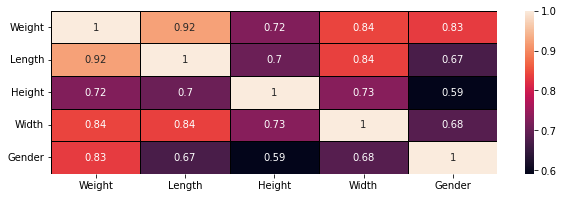

In [36]:
import matplotlib.pyplot as plt
corr = df.corr()

import seaborn as sns
plt.figure(figsize=(10, 3))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, linewidths=1, linecolor='black')
plt.show()

In [37]:
y = df['Weight']
X = df.drop('Weight', axis = 1)
y.shape, X.shape

((159,), (159, 4))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RS)
#X_train.head()

In [39]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_train_scalled = sc_x.fit_transform(X_train)
X_test_scalled = sc_x.transform(X_test)

y_train_scalled = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scalled = sc_y.transform(np.array(y_test).reshape(-1, 1))

pd.DataFrame(X_train_scalled).head()

,0,1,2,3
0,0.677208,0.403823,0.766209,1.759765
1,-0.783458,-0.763892,-0.019082,-0.568258
2,0.859791,0.539018,1.342023,1.759765
3,-0.244403,-0.120610,-0.297111,-0.568258
4,-0.696513,-0.720215,-1.117441,-0.568258


In [40]:
from sklearn.metrics import mean_absolute_error

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ 17.28043436,   4.2427348 ,  14.55583428, 317.26652491])

In [41]:
y_pr = reg.predict(X_test)

In [42]:
def regression_results(y_true, y_pred,n,p):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Adj_r2: ', round(1-(1-r2)*(n-1)/(n-p-1),4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [43]:
regression_results(y_test, y_pr, X_test_scalled.shape[0], X_test_scalled.shape[1])

Adj_r2:  0.9242
r2:  0.934
MAE:  64.1076
MSE:  9172.9632
RMSE:  95.7756


In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train_scalled = sm.add_constant(X_train_scalled)
X_test_scalled = sm.add_constant(X_test_scalled)

model = sm.OLS(y_train_scalled, X_train_scalled).fit()

y_pr_scalled = model.predict(X_test_scalled) 
y_pr = sc_y.inverse_transform(np.array(y_pr_scalled).reshape(-1, 1))

print_model = model.summary()
print(df.columns)
print(print_model)

Index(['Weight', 'Length', 'Height', 'Width', 'Gender'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     470.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           4.28e-73
Time:                        02:38:06   Log-Likelihood:                -2.5096
No. Observations:                 127   AIC:                             15.02
Df Residuals:                     122   BIC:                             29.24
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------